In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import join

In [2]:
def softplus(x):
    return np.log(1 + np.exp(x))

softplus(-10000), softplus(-30), softplus(0), softplus(30)

(np.float64(0.0),
 np.float64(9.348077867343381e-14),
 np.float64(0.6931471805599453),
 np.float64(30.000000000000092))

In [3]:
def softplus_inverse(x):
    return np.log(np.exp(x) - 1)

softplus_inverse(softplus(-30)), softplus_inverse(softplus(0)), softplus_inverse(softplus(16)), softplus_inverse(softplus(300))

(np.float64(-30.001020555434774),
 np.float64(0.0),
 np.float64(16.0),
 np.float64(300.0))

In [4]:
import scienceplots
plt.style.use('science')

# FONTS
from font import SETTINGS
for key in SETTINGS:
    plt.rc(key, **SETTINGS[key])

COLOR = plt.rcParams['axes.prop_cycle']
COLOR = [v for elem in list(COLOR) for _, v in elem.items()]

CLR = {
    'alpha': COLOR[0],
    'hatbeta': COLOR[1],
    'hatalpha': COLOR[2],
    'beta': COLOR[4],
}

In [5]:
def alpha2beta(_alpha):
    return [1/elem**2 for elem in _alpha]

def beta2hatbeta(_beta):
    return [softplus_inverse(elem) for elem in _beta]

def alpha2hatbeta(_alpha):
    return beta2hatbeta(alpha2beta(_alpha))


def hatbeta2beta(_hatbeta):
    return [softplus(elem) for elem in _hatbeta]

def beta2alpha(_beta):
    return [1/np.sqrt(elem) for elem in _beta]

def hatbeta2alpha(_hatbeta):
    return beta2alpha(hatbeta2beta(_hatbeta))


def alpha2hatalpha(_alpha):
    return [softplus_inverse(elem) for elem in _alpha]

def hatalpha2alpha(_hatalpha):
    return [softplus(elem) for elem in _hatalpha]


def two_decimals(_list):
    return [float(f'{elem:.2f}') for elem in _list]

In [6]:
alpha = [0.5, 0.69, 1, 2, 3]
beta_from_alpha = alpha2beta(alpha)
hatbeta_from_beta_from_alpha = two_decimals(beta2hatbeta(beta_from_alpha))

hatbeta = [-2, -1, 1, 2, 4]
beta_from_hatbeta = two_decimals(hatbeta2beta(hatbeta))
alpha_from_beta_from_hatbeta = two_decimals(beta2alpha(beta_from_hatbeta))

beta = [0.11, 0.25, 1, 2, 4]
hatalpha = [3, 2, 1, 0, -1]

x_plot = np.linspace(-3, 3, 100)
print('STARTING FROM ALPHA')
print('alpha =', alpha)
print('beta =', beta_from_alpha)
print('hatbeta =', hatbeta_from_beta_from_alpha)
print('----')
print('STARTING FROM HATBETA')
print('hatbeta =', hatbeta)
print('beta =', beta_from_hatbeta)
print('alpha =', alpha_from_beta_from_hatbeta)
print('----')
print('STARTING FROM BETA')
print('beta =', beta)
print('hatbeta =', two_decimals(beta2hatbeta(beta)))
print('alpha =', two_decimals(beta2alpha(beta)))

STARTING FROM ALPHA
alpha = [0.5, 0.69, 1, 2, 3]
beta = [4.0, 2.100399075824407, 1.0, 0.25, 0.1111111111111111]
hatbeta = [3.98, 1.97, 0.54, -1.26, -2.14]
----
STARTING FROM HATBETA
hatbeta = [-2, -1, 1, 2, 4]
beta = [0.13, 0.31, 1.31, 2.13, 4.02]
alpha = [2.77, 1.8, 0.87, 0.69, 0.5]
----
STARTING FROM BETA
beta = [0.11, 0.25, 1, 2, 4]
hatbeta = [-2.15, -1.26, 0.54, 1.85, 3.98]
alpha = [3.02, 2.0, 1.0, 0.71, 0.5]


### alpha & hatbeta

In [7]:
def plot_alpha_hatbeta(_alpha, _hatbeta, xlim=[0, 3.5], ylim=[-2.5, 16.5], save_as=''):

    fig, ax = plt.subplots(1, 1, figsize=(6,4))
    ax = [ax, None]
    
    alpha_plot = np.linspace(0.25, 3, 100)
    hatbeta_plot = np.linspace(-3, 16, 100)
    
    _ = ax[0].plot(alpha_plot, alpha2hatbeta(alpha_plot), color='k', label='theory')
    _ = ax[0].plot(hatbeta2alpha(_hatbeta), _hatbeta, marker='D', linestyle='', color=CLR['hatbeta'], label=r'$\widehat \beta_0$')
    _ = ax[0].plot(_alpha, alpha2hatbeta(_alpha), marker='s', linestyle='', color=CLR['alpha'], label=r'$\alpha_0$')
    _ = ax[0].set_xlabel(r'$\alpha_0$')
    _ = ax[0].set_ylabel(r'$\widehat \beta_0$')
    _ = ax[0].set_xlim(xlim)
    _ = ax[0].set_ylim(ylim)
    _ = ax[0].legend()

    if len(save_as):
        assert save_as.endswith('pdf')
        save_path = join('figs', save_as)
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        print(f'> saved as {save_path}')

> saved as figs/dyt_dyisrusp.pdf


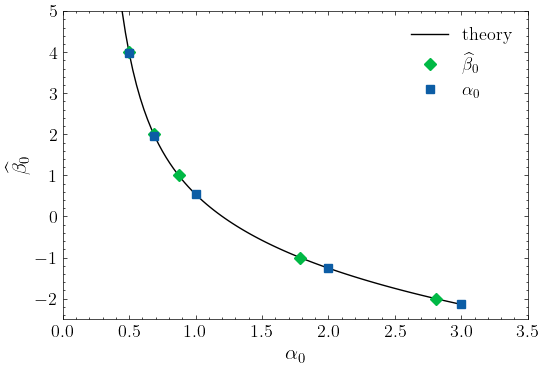

In [8]:
plot_alpha_hatbeta(alpha, hatbeta, ylim=[-2.5, 5], save_as='dyt_dyisrusp.pdf')

### alpha & beta

In [9]:
def plot_alpha_beta(_alpha, _beta, xlim=[0, 3.5], ylim=[-2.5, 16.5], save_as=''):

    fig, ax = plt.subplots(1, 1, figsize=(6,4))
    ax = [ax, None]
    
    alpha_plot = np.linspace(0.25, 3, 100)
    hatbeta_plot = np.linspace(-3, 16, 100)
    
    _ = ax[0].plot(alpha_plot, alpha2beta(alpha_plot), color='k', label='theory')
    _ = ax[0].plot(beta2alpha(_beta), _beta, marker='D', linestyle='', color=CLR['beta'], label=r'$\beta_0$')
    _ = ax[0].plot(_alpha, alpha2beta(_alpha), marker='s', linestyle='', color=CLR['alpha'], label=r'$\alpha_0$')
    _ = ax[0].set_xlabel(r'$\alpha_0$')
    _ = ax[0].set_ylabel(r'$\beta_0$')
    _ = ax[0].set_xlim(xlim)
    _ = ax[0].set_ylim(ylim)
    _ = ax[0].legend()

    if len(save_as):
        assert save_as.endswith('pdf')
        save_path = join('figs', save_as)
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        print(f'> saved as {save_path}')

    print(r'beta0 from alpha0:', two_decimals(alpha2beta(_alpha[::-1])))

> saved as figs/dyt_dyisru.pdf
beta0 from alpha0: [0.11, 0.25, 1.0, 2.1, 4.0]


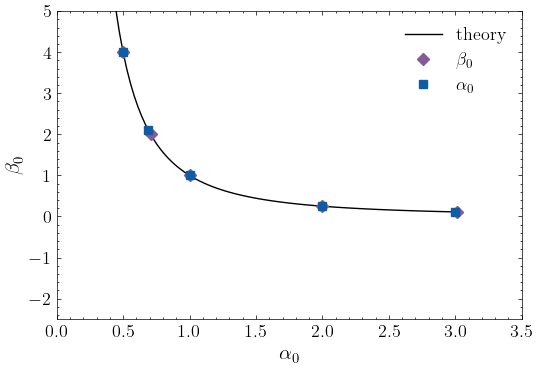

In [10]:
plot_alpha_beta(alpha, beta, ylim=[-2.5, 5], save_as='dyt_dyisru.pdf')

### alpha & hatalpha

In [11]:
def plot_alpha_hatalpha(_alpha, _hatalpha, xlim=[0, 3.5], ylim=[-2.5, 16.5], save_as=''):

    fig, ax = plt.subplots(1, 1, figsize=(6,4))
    ax = [ax, None]
    
    alpha_plot = np.linspace(0.25, 3, 100)
    hatbeta_plot = np.linspace(-3, 16, 100)
    
    _ = ax[0].plot(alpha_plot, alpha2hatalpha(alpha_plot), color='k', label='theory')
    _ = ax[0].plot(hatalpha2alpha(_hatalpha), _hatalpha, marker='D', linestyle='', color=CLR['hatalpha'], label=r'$\widehat \alpha_0$')
    _ = ax[0].plot(_alpha, alpha2hatalpha(_alpha), marker='s', linestyle='', color=CLR['alpha'], label=r'$\alpha_0$')
    _ = ax[0].set_xlabel(r'$\alpha_0$')
    _ = ax[0].set_ylabel(r'$\widehat \alpha_0$')
    _ = ax[0].set_xlim(xlim)
    _ = ax[0].set_ylim(ylim)
    _ = ax[0].legend()

    if len(save_as):
        assert save_as.endswith('pdf')
        save_path = join('figs', save_as)
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        print(f'> saved as {save_path}')

    print(r'hatalpha0 from alpha0:', two_decimals(alpha2hatalpha(_alpha[::-1])))

> saved as figs/dyt_dytsp.pdf
hatalpha0 from alpha0: [2.95, 1.85, 0.54, -0.01, -0.43]


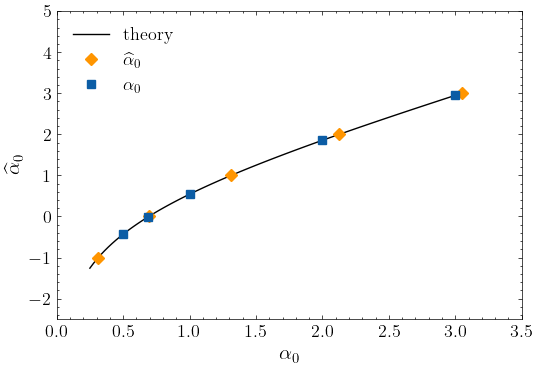

In [12]:
plot_alpha_hatalpha(alpha, hatalpha, ylim=[-2.5, 5], save_as='dyt_dytsp.pdf')